In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [96]:
# * Генерація випадкових ознак
np.random.seed(0) 
n_samples = 100 
n_features = 3
columns = ['Feature 1', 'Feature 2', 'Feature 3', 'yes/no']

data = np.random.normal(19191, 91919, size =(n_samples, n_features)) 
df = pd.DataFrame(data, columns=columns[0:3]) 
cl = np.random.randint(2, size=(n_samples))
df['yes/no'] = cl
df.to_csv('випадкові_дані.csv', index=False)   
df

,Feature 1,Feature 2,Feature 3,yes/no
0,181340.927589,55973.050436,109155.616761,0
1,225171.661977,190855.062897,-70639.405440,0
2,106522.177251,5278.396770,9703.226362,1
3,56932.803700,32431.341018,152866.366487,1
4,89144.826658,30375.245841,59990.464491,0
...,...,...,...,...
95,75155.316421,-76887.644163,130518.263882,0
96,82598.395866,138855.403575,-38542.180395,1
97,-25024.531702,230964.718934,-78244.594409,1
98,6694.639463,123692.917159,28173.781307,1


In [95]:
data = pd.read_csv('випадкові_дані.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  100 non-null    float64
 1   Feature 2  100 non-null    float64
 2   Feature 3  100 non-null    float64
 3   yes/no     100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [94]:
data.describe()

,Feature 1,Feature 2,Feature 3,yes/no
count,100.000000,100.000000,100.000000,100.000000
mean,28430.744787,28957.606099,7776.122194,0.500000
std,94787.158300,90721.651601,90163.437392,0.502519
min,-185181.994349,-235662.953578,-215477.270882,0.000000
25%,-25307.016366,-39530.875518,-55557.602160,0.000000
50%,24485.874041,31403.293429,6206.746438,0.500000
75%,84574.941566,90349.398836,70959.298473,1.000000
max,238247.284561,230964.718934,226864.419439,1.000000


In [93]:
X = data.drop('yes/no', axis=1)
y = data['yes/no']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lg_regression = LogisticRegression()
lg_regression.fit(X_train, y_train)
y_pred = lg_regression.predict(X_test)

# * Загальна точність прикладів
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
# * Позитивні приклади
print("Precision: ", metrics.precision_score(y_test, y_pred)) 
# * Ефективність виявлявлення позитивних прикладів
print("Recall: ", metrics.recall_score(y_test, y_pred)) 
 # * Середня гармонічна точності та повноти
print("F1: ", metrics.f1_score(y_test, y_pred, average = None))

Accuracy: 0.5666666666666667
Precision:  0.47058823529411764
Recall:  0.6666666666666666
F1:  [0.58064516 0.55172414]


In [91]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        18
           1       0.47      0.67      0.55        12

    accuracy                           0.57        30
   macro avg       0.58      0.58      0.57        30
weighted avg       0.60      0.57      0.57        30



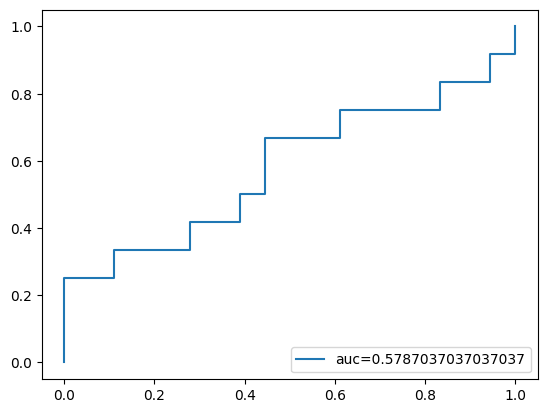

In [89]:
# * Метрика для оцінки якості моделі класифікації
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba) 

plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()

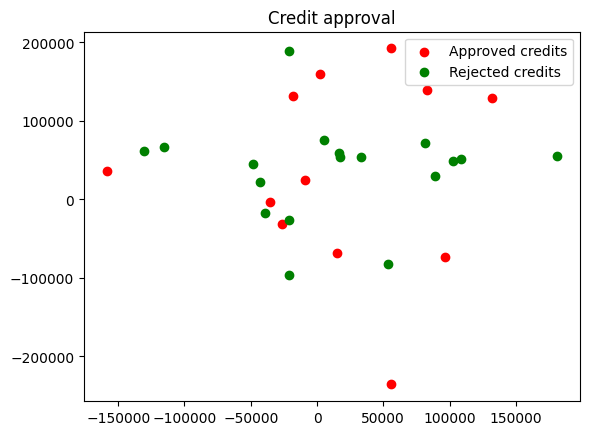

In [90]:
a_category = X_test[y_test == 1]
r_category = X_test[y_test == 0]

# * for "approved" credits
plt.scatter(a_category.iloc[:, 0], a_category.iloc[:, 1], label='Approved credits', c='r')

# * for "rejected" credits
plt.scatter(r_category.iloc[:, 0], r_category.iloc[:, 1], label='Rejected credits', c='g')

plt.title('Credit approval')
plt.legend(loc='best')
plt.show()